## 导入原始数据

当前保存的数据为csv，使用pandas读取

In [46]:
import pandas as pd
import numpy as np

使用爬虫的记录数据文件，检查前面行数据

In [57]:
bangumi_data = pd.read_csv('bangumi_total.csv')
bangumi_data.head(3)

,season_id,title,play_count,danmaku_count,coins,favorites,score,total_count,week,newest_ep_index,is_finish,area,arealimit,pub_time,season_status,copyright,tags,actor
0,21674,三丽鸥男子,1391267.0,37429.0,2546.0,165221,8.9,12,6,11,1,日本,0.0,2018-01-06 22:30:00,2,dujia,原创,江口拓也 斉藤壮馬 大須賀純 花倉洸幸 内田雄馬
1,23677,Thunderbolt Fantasy 东离剑游纪 生死一剑,385152.0,14105.0,6271.0,30369,9.7,1,-1,1,2,日本,0.0,2017-12-02 00:00:01,2,dujia,奇幻 战斗,凜雪鴉（リンセツア）\t鳥海 浩輔 殤不患（ショウフカン）\t諏訪部 順一 殺無生（セツムシ...
2,3888,蜡笔小新 呼风唤雨！会唱歌的屁股炸弹,43741.0,1744.0,134.0,1851,NaN,1,6,1,2,日本,0.0,2007-04-21 00:00:01,2,bilibili,少儿 搞笑 萌系,矢岛晶子 楢桥美纪 藤原启治 真柴摩利 林玉绪


## 绘制简单的条形图

使用matplotlib绘图

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

番剧制作**播放星期**用横向条的条形图绘制

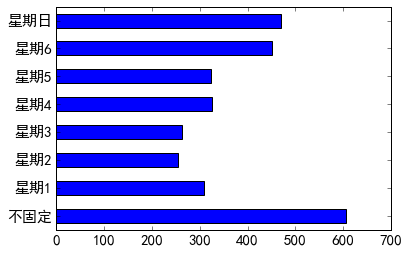

不固定    606
星期1    308
星期2    254
星期3    263
星期4    325
星期5    323
星期6    451
星期日    471
dtype: int64

In [39]:
week_count = bangumi_data['week'].value_counts()

d_dic = {'星期'+str(i):week_count[i] for i in week_count.index if i > 0}
d_dic['星期日'] = week_count[0]
d_dic['不固定'] = week_count[-1]
weeks = pd.Series(d_dic)

plt.rc('font', family='SimHei', size=15)     # 设置字体和大小，显示中文标签
weeks.plot(kind='barh', rot =0)
plt.show()
weeks

番剧**国家（Area）**用横向条的条形图绘制纵向条

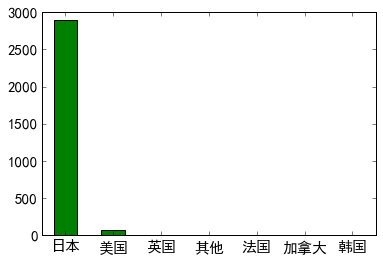

日本     2899
美国       76
英国        7
其他        3
法国        3
加拿大       2
韩国        2
Name: area, dtype: int64

In [56]:
bangumi_data['area'].value_counts().plot(kind='bar', rot =0,color='g')
plt.show()
bangumi_data['area'].value_counts()

## 绘制词云

先从字符串中分词，由于我记录时有用空格分离每个词，所以可以直接连接成整个字符串，提取番剧**类型（Tag）**的词量数据。复杂的分词可以用其他库，如***jieba***。

In [7]:
from numpy import NaN
tags_words = bangumi_data['tags']
# tags_words = tags_words.dropna()
# tags_words_split = tags_words.apply(lambda x: x.split(' '))

tags = ''
for idx in range(tags_words.shape[0]):
    if tags_words[idx] is not NaN:
        tags += tags_words[idx]+ ' '
tags[:100]

'原创 奇幻 战斗 少儿 搞笑 萌系 运动 热血 运动 时泪 日常 搞笑 萌系 漫改 少儿 萌系 时泪 日常 日常 搞笑 校园 社团 原创 日常 神魔 少女 魔法 漫改 日常 游戏改 漫改 原创 热血 '

使用***wordcloud***库生成词云图

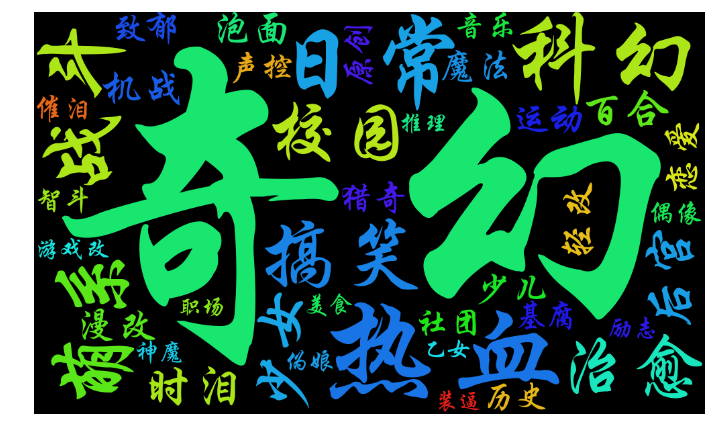

In [18]:
from wordcloud import WordCloud

bangumitag_wordcloud = WordCloud(font_path=r'方正行楷_GBK.ttf', width = 1000, height=600).generate(tags)
plt.figure(figsize=(12,12)) 
plt.imshow(bangumitag_wordcloud)
plt.axis('off')
plt.show()

## 制作饼图

选用**版权所有（copyright）**数据做饼图

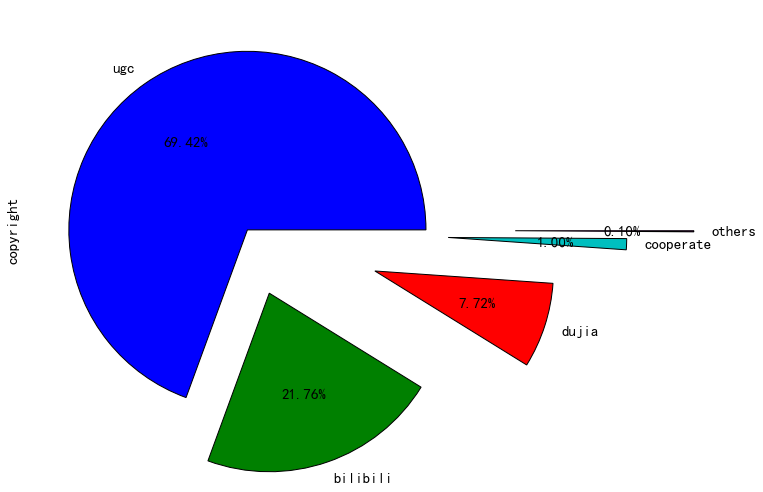

In [55]:
plt.figure(figsize=(8,8)) 
area = bangumi_data['copyright'].value_counts()
area.plot(kind='pie', autopct='%1.2f%%', explode=np.linspace(0,1.5,len(area)))
plt.show()

In [9]:
%magic matplotlib